# Đồ án cuối kỳ môn Lập trình cho KHDL - CSC17104_21KHDL1

---
## 1. Thông tin nhóm: Nhóm 12

- Thành viên:
    - Nguyễn Trọng Đại - 21127587
    - Nguyễn Tấn Khiêm - 21127726

---
## 2. Import thư viện cần thiết

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

---
## 3. Thu thập dữ liệu

- Mô tả dữ liệu: ...
- Tác giả: ...
- License: ...
- Cách tác giả thu thập dữ liệu: ...

---
## 4. Khám phá dữ liệu + Tiền xử lý

### 4.0. Đọc dữ liệu

In [10]:
# TODO: Đọc data từ file csv và lưu vào df. Hiển thị 5 dòng ngẫu nhiên
df = pd.read_csv("./data/Sleep_health_and_lifestyle_dataset.csv")
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
158,159,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,NaN
340,341,Female,55,Nurse,8.1,9,75,4,Overweight,140/95,72,5000,Sleep Apnea
282,283,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
157,158,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,NaN
329,330,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN


### 4.1. Số dòng, số cột

In [11]:
# TODO: Lưu số dòng vào số cột vào n_rows, n_cols

n_rows, n_cols

NameError: name 'n_rows' is not defined

### 4.2. Khám phá dòng

- Nhận xét dòng: các dòng thể hiện khảo sát của một Person ID.

In [12]:
# TODO: Kiểm tra duplicate, lưu vào 'is_duplicated'
is_duplicated = df.duplicated()

print("Dữ liệu có duplicate? :", is_duplicated)

Dữ liệu có duplicate? : 0      False
1      False
2      False
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Length: 374, dtype: bool


In [13]:
# TODO: Nếu có duplicate thì loại bỏ nó
df = df.drop_duplicates()

### 4.3. Khám phá cột

- Nhận xét cột: kiểu dữ liệu của các cột đều hợp lý.

In [14]:
# TODO: Liệt kê tên các cột và kiểu dữ liệu tương ứng

# Liệt kê tên các cột và kiểu dữ liệu
column_types = df.dtypes

# Hiển thị thông tin
print("Tên cột và kiểu dữ liệu:")
print(column_types)

Tên cột và kiểu dữ liệu:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


### 4.4. Loại bỏ các dòng và cột vô nghĩa

- **TODO**: Các dòng trong dataset đều là các khảo sát được thực hiện ở các cá nhân khác nhau nên đều có nghĩa.


In [24]:
# TODO: Loại bỏ các dòng vô nghĩa

- **TODO**: Cột Person ID là vô nghĩa do có thể thấy nó được sắp xếp theo thứ tự tăng dần, nên ta chỉ cần truy xuất vị trí index ta sẽ có được Person ID nếu cần.

In [15]:
# TODO: Loại bỏ các cột vô nghĩa
df = df.drop(columns=['Person ID'])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### 4.5. Xử lý data thiếu và chuyển đổi kiểu dữ liệu

- Bảng tóm tắt của Dataframe:

In [ ]:
# TODO: Hiển thị bảng tóm tắt của Dataframe


- **TODO**: Nhận xét bảng tóm tắt
- **TODO**: Đối với những dòng bị thiếu, xử lý thế nào?

In [ ]:
# TODO: Xử lý các dòng bị thiếu


- **TODO**: Từ bảng tóm tắt, nhận xét dữ liệu các cột có đúng hay chưa.

In [ ]:
# TODO: Chuyển đổi kiểu dữ liệu cho đúng


### 4.6. Phân bố dữ liệu

#### 4.6.1. Dữ liệu Numeric

- Bảng giá trị lượng tử Numeric:

In [16]:
# TODO: Tính giá trị lượng tử (min, 25%, 50%, 75%, max) của từng cột Numeric, lưu vào 'numeric_col_profile'
# 'numeric_col_profile' là 1 dataframe có col là các cột của df, index là 5 giá trị lượng tử


# Lọc ra các cột numeric
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Tính giá trị lượng tử (min, 25%, 50%, 75%, max) cho mỗi cột numeric
def calculate_quantiles(column):
    return pd.Series(np.percentile(column, [0, 25, 50, 75, 100]), index=['min', '25%', '50%', '75%', 'max'])

numeric_col_profile = numeric_columns.apply(calculate_quantiles)

# Hiển thị DataFrame mới
numeric_col_profile


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
min,27.00,5.8,4.0,30.0,3.0,65.0,3000.0
25%,35.25,6.4,6.0,45.0,4.0,68.0,5600.0
50%,43.00,7.2,7.0,60.0,5.0,70.0,7000.0
75%,50.00,7.8,8.0,75.0,7.0,72.0,8000.0
max,59.00,8.5,9.0,90.0,8.0,86.0,10000.0


- Biểu đồ phân bố dữ liệu Numeric:

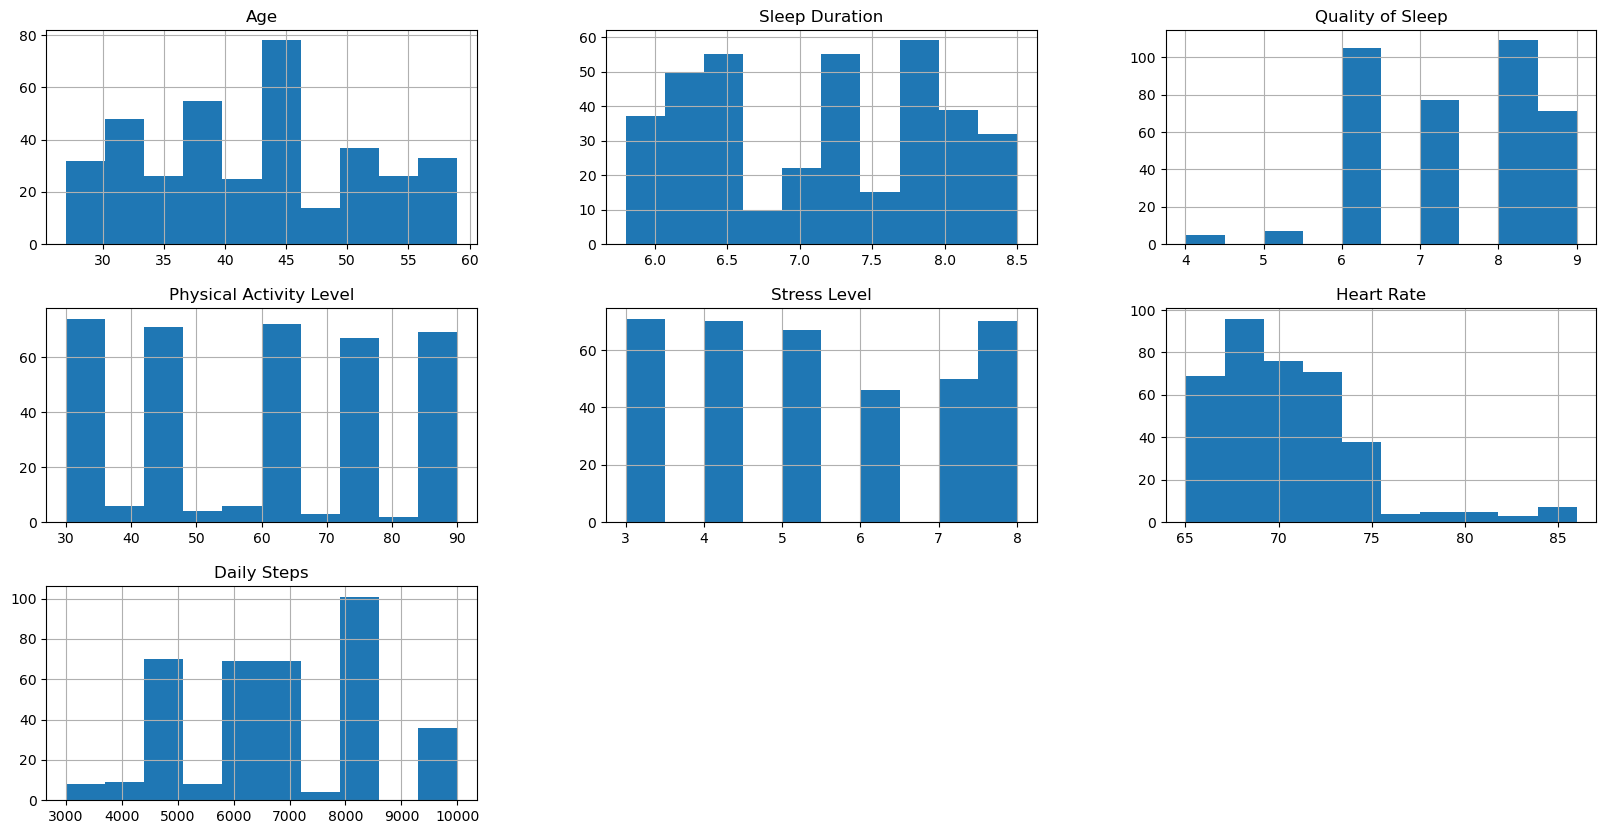

In [23]:
# TODO: In ra biểu đồ cột phân bố dữ liệu Numeric dựa vào 'numeric_col_profile'

numeric_columns.hist(bins=10, figsize=(20,10))
plt.show()

*Nhận xét về sự phân bố dữ liệu của các cột Numeric:*
1. **Age (Độ Tuổi):**
   - Độ tuổi của người được khảo sát nằm trong khoảng 27-59.
   - Phần lớn người có độ tuổi ở mức trung bình (50% ở khoảng 43 tuổi), với người đông nhất ở tuổi 45.
   - Tuổi tăng dần từ 27 đến 59.

2. **Sleep Duration (Thời Gian Ngủ):**
   - Thời gian ngủ trung bình của người được khảo sát là 7.2 giờ.
   - Người có thời gian ngủ ít nhất là 5.8 giờ và nhiều nhất là 8.5 giờ.

3. **Quality of Sleep (Chất lượng Ngủ):**
   - Chất lượng ngủ trung bình là 7.0 điểm trên thang điểm từ 1 đến 9.
   - Người có chất lượng ngủ thấp nhất là 4.0 và cao nhất là 9.0.

4. **Physical Activity Level (Mức Độ Hoạt Động Thể Chất):**
   - Mức độ hoạt động thể chất trung bình là 60.0.
   - Người có mức độ hoạt động thấp nhất là 30.0 và cao nhất là 90.0.

5. **Stress Level (Mức Độ Stress):**
   - Mức độ stress trung bình là 5.0.
   - Người có mức độ stress thấp nhất là 3.0 và cao nhất là 8.0.

6. **Heart Rate (Nhịp Tim):**
   - Nhịp tim trung bình là 70.0 bpm.
   - Người có nhịp tim thấp nhất là 65.0 bpm và cao nhất là 86.0 bpm.

7. **Daily Steps (Bước Chân Hằng Ngày):**
   - Số bước chân trung bình là 7000 bước/ngày.
   - Người có số bước chân ít nhất là 3000 và nhiều nhất là 10000 bước/ngày.

Những thông tin trên cung cấp cái nhìn tổng quan về các chỉ số quan trọng liên quan đến sức khỏe và lối sống của người được khảo sát.

#### 4.6.2. Dữ liệu Categorical

- Bảng phân bố dữ liệu Categorical:

In [ ]:
# TODO: Tính các giá trị unique của mỗi cột, và 1 dictionary ứng với mỗi cột có key là giá trị unique, value là số lượng của nó trong cột
# Lưu vào 'single_cate_profile' là 1 dataframe có index là số lượng unique của cột và dictionary tương ứng
# có col là các cột của df

single_cate_profile

- Biểu đồ phân bố dữ liệu Categorical:

In [ ]:
# TODO: In ra biểu đồ hình tròn (pie chart) phân bố dữ liệu Categorical dựa vào 'single_cate_profile'
# Ghi rõ chú thích cho từng biểu đồ


- **TODO**: Nhận xét về sự phân bố dữ liệu của các cột Categorical

---
## 5. Đặt câu hỏi có ý nghĩa

### 5.1. Câu hỏi 1: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.1.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [ ]:
# TODO: Code tiền xử lý câu hỏi 1


#### 5.1.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [ ]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 1


### 5.2. Câu hỏi 2: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.2.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [ ]:
# TODO: Code tiền xử lý câu hỏi 2


#### 5.2.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [ ]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 2


### 5.3. Câu hỏi 3: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.3.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [ ]:
# TODO: Code tiền xử lý câu hỏi 3


#### 5.3.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [ ]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 3


### 5.4. Câu hỏi 4: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.4.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [ ]:
# TODO: Code tiền xử lý câu hỏi 4


#### 5.4.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [ ]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 4


---
## 6. Phản ánh bản thân sau khi hoàn thành đồ án

### 6.1. Những khó khăn gặp phải?

- Nguyễn Trọng Đại:
    - ...
- Nguyễn Tấn Khiêm:
    - ...
    
### 6.2. Kinh nghiệm, bài học đạt được khi làm đồ án?

- Nguyễn Trọng Đại:
    - ...
- Nguyễn Tấn Khiêm:
    - ...
    
### 6.3. Nếu có thêm thời gian, nhóm sẽ làm:

- ...

---
## 7. Tài liệu sử dụng

- ...